Matteo Picciolini

# Esercitazione 11

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Soluzione

Considero la retta
$$
f(x)=2x+1
$$
ed eseguo tentativi di fit su di essa tramite una rete neurale sequenziale.

Il codice per questo esercizio è stato già fornito e funziona implementando una rete con un solo neurone. 
È sufficiente una rete così semplice in quanto ogni neurone per definizione riceve un input $x$ e restituisce un output $y=mx+b$, dove $m$ e $b$ sono i parametri che il modello dovrà calibrare.

Come richiesto, si è testata la rete al variare dei seguenti parametri:
- $N_{\mathrm{epochs}}$, numero di epoche;
- $N_{\mathrm{train}}$, numero di dati di *train*;
- $\sigma$, rumore.

In [3]:
N_epochs = 30
N_train = 100 # <<< train
N_valid = 50 # <<< test
sigma = 0.2

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

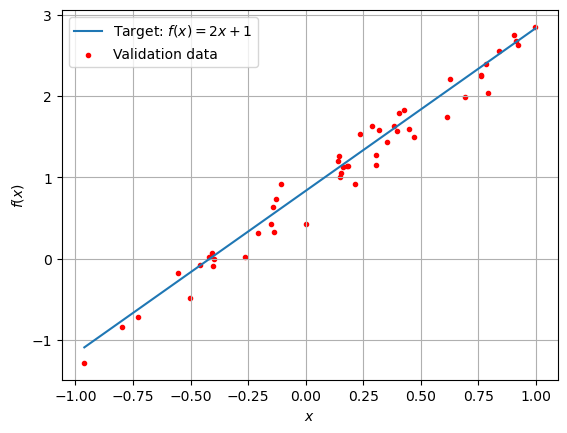

In [11]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

# actual measures from which we want to guess regression parameters
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label = 'Target: $f(x)= 2x +1$')
plt.scatter(x_valid, y_valid, color = 'r', marker = '.', label = 'Validation data')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid(True)
plt.show()

Nello specchietto sopra ho calcolato i dati per il *training* e per la fase di *validation*, utilizzando la funzione *target* e aggiungendo un rumore gaussiano. Il grafico riportato mostra la funzione *target* e i dati di validazione. 

In [6]:
# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# a single neuron can make the fitting job, so
# i use only one layer on one neuron.
# ==============================================
model = tf.keras.Sequential()
model.add(Dense(1, input_shape = (1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = N_epochs,
                    shuffle = True, validation_data = (x_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 1s 67ms/step - loss: 3.7837 - mse: 3.7837 - val_loss: 4.0229 - val_mse: 4.0229
Epoch 2/30
4/4 [==============================] - 0s 20ms/step - loss: 3.4870 - mse: 3.4870 - val_loss: 3.6714 - val_mse: 3.6714
Epoch 3/30
4/4 [==============================] - 0s 14ms/step - loss: 3.2406 - mse: 3.2406 - val_loss: 3.4559 - val_mse: 3.4559
Epoch 4/30
4/4 [==============================] - 0s 12ms/step - loss: 3.0651 - mse: 3.0651 - val_loss: 3.2679 - val_mse: 3.2679
Epoch 5/30
4/4 [==============================] - 0s 14ms/step - loss: 2.9102 - mse: 2.9102 - val_loss: 3.0248 - val_mse: 3.0248
Epoch 6/30
4/4 [==============================] - 0s 16ms/step - loss: 2.7211 - mse: 2.7211 - val_loss: 2.7982 - val_mse: 2.7982
Epoch 7/30
4/4 [==============================] - 0s 15ms/step - loss: 2.5548 - mse: 2.5548 - val_loss: 2.5741 - val_mse: 2.5741
Epoch 8/30
4/4 [==============================] - 0s 17ms/step - loss: 2.3901 - mse: 2.3901 - val

In [7]:
print("Guessed parameters")
w,b = model.get_weights()
print("Slope   m = "+str(w[0][0]))
print("Interc. q = "+str(b[0]))
print()
# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

Guessed parameters
Slope   m = 0.60141397
Interc. q = 0.83406943

TEST DATA evaluation
Test loss:      0.624207079410553
Test accuracy:  0.624207079410553

EXACT CURVE evaluation
Test loss:      0.6329208612442017
Test accuracy:  0.6329208612442017


4/4 [==============================] - 0s 2ms/step


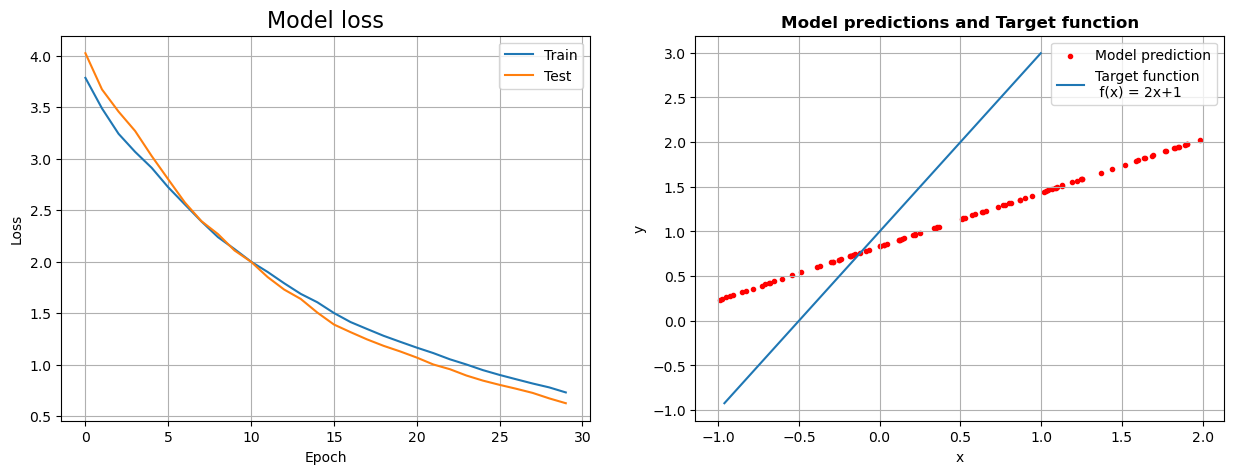

In [9]:
plt.figure(figsize = (15, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = '16')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.grid()

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-1, 2, 100) 
y_predicted = model.predict(x_predicted)

# plot
plt.subplot(1, 2, 2)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
plt.plot(x_valid, y_target, label = "Target function\n f(x) = 2x+1")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and Target function", fontweight = "bold")
plt.grid()
plt.legend()
plt.show()